In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import hddm 
from patsy import dmatrix 
import numpy as np
from sys import platform
print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=10, rc={"lines.linewidth": 10, "lines.markersize": 30})

0.6.0


/home/krista/anaconda3/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Pre-processing

In [3]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/67981492/'

In [78]:
!pwd
write_dir = home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

/home/krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [120]:
all_sim_data = hddm.load_csv(home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/probC_sim_learning_signals_processed.csv')

In [121]:
all_sim_data.head(10)

,cpp,target_B,choice_B,cp,gen_drift,gen_bound,rt,acc,subj_idx,ID,...,correct_id_choices,b_t0,b_t1,r_t1,r_t2,obs_cp,trial,ideal_B,B_ideal_target,B_nonideal_target
0,0.099471,0.000000,0.000000,1,0.013572,0.416406,0.700,False,0,761,...,1,0.000000,0.000000,2.528877,0.000000,0,1,0.000000,0.000000,0.000000
1,0.035079,0.000000,0.000000,0,0.013572,0.599471,0.700,False,0,761,...,1,1.390214,0.149207,0.000000,3.978021,1,2,-1.241007,0.149207,1.390214
2,0.023075,-1.241007,1.241007,0,0.013572,0.535079,0.700,False,0,761,...,1,0.792372,0.196591,0.000000,2.754457,0,3,-0.595781,0.196591,0.792372
3,0.019881,-0.595781,0.595781,0,-1.000000,0.523075,0.172,False,0,761,...,1,0.532802,0.226667,0.000000,3.330826,0,4,-0.306135,0.226667,0.532802
4,0.018539,-0.306135,0.306135,0,-1.000000,0.519881,0.172,False,0,761,...,1,0.391376,0.251982,0.000000,2.527291,0,5,-0.139394,0.251982,0.391376
5,0.268538,-0.139394,0.139394,0,-1.000000,0.518539,0.172,False,0,761,...,1,0.302804,0.275119,3.036967,0.000000,1,6,-0.027685,0.275119,0.302804
6,0.035630,-0.027685,0.027685,0,-1.000000,0.768538,0.172,False,0,761,...,1,1.408409,0.604046,0.000000,3.361235,1,7,-0.804363,0.604046,1.408409
7,0.785155,-0.804363,0.804363,0,-1.000000,0.535630,0.172,False,0,761,...,1,0.571150,0.635969,4.661588,0.000000,1,8,0.064818,0.635969,0.571150
8,0.352873,0.064818,-0.064818,0,-1.000000,1.285155,0.172,False,0,761,...,1,4.114561,1.314367,-0.099227,0.000000,0,9,-2.800194,1.314367,4.114561
9,0.206726,-2.800194,2.800194,0,-0.935182,0.852873,0.192,False,0,761,...,1,0.822059,1.379872,4.103838,0.000000,0,10,0.557813,1.379872,0.822059


In [122]:
all_sim_data.columns = all_sim_data.columns.str.strip()
all_sim_data.head()

,cpp,target_B,choice_B,cp,gen_drift,gen_bound,rt,acc,subj_idx,ID,...,correct_id_choices,b_t0,b_t1,r_t1,r_t2,obs_cp,trial,ideal_B,B_ideal_target,B_nonideal_target
0,0.099471,0.000000,0.000000,1,0.013572,0.416406,0.700,False,0,761,...,1,0.000000,0.000000,2.528877,0.000000,0,1,0.000000,0.000000,0.000000
1,0.035079,0.000000,0.000000,0,0.013572,0.599471,0.700,False,0,761,...,1,1.390214,0.149207,0.000000,3.978021,1,2,-1.241007,0.149207,1.390214
2,0.023075,-1.241007,1.241007,0,0.013572,0.535079,0.700,False,0,761,...,1,0.792372,0.196591,0.000000,2.754457,0,3,-0.595781,0.196591,0.792372
3,0.019881,-0.595781,0.595781,0,-1.000000,0.523075,0.172,False,0,761,...,1,0.532802,0.226667,0.000000,3.330826,0,4,-0.306135,0.226667,0.532802
4,0.018539,-0.306135,0.306135,0,-1.000000,0.519881,0.172,False,0,761,...,1,0.391376,0.251982,0.000000,2.527291,0,5,-0.139394,0.251982,0.391376


In [123]:
all_sim_data.columns

Index(['cpp', 'target_B', 'choice_B', 'cp', 'gen_drift', 'gen_bound', 'rt',
       'acc', 'subj_idx', 'ID', 'cond', 'id_choices', 'correct_id_choices',
       'b_t0', 'b_t1', 'r_t1', 'r_t2', 'obs_cp', 'trial', 'ideal_B',
       'B_ideal_target', 'B_nonideal_target'],
      dtype='object')

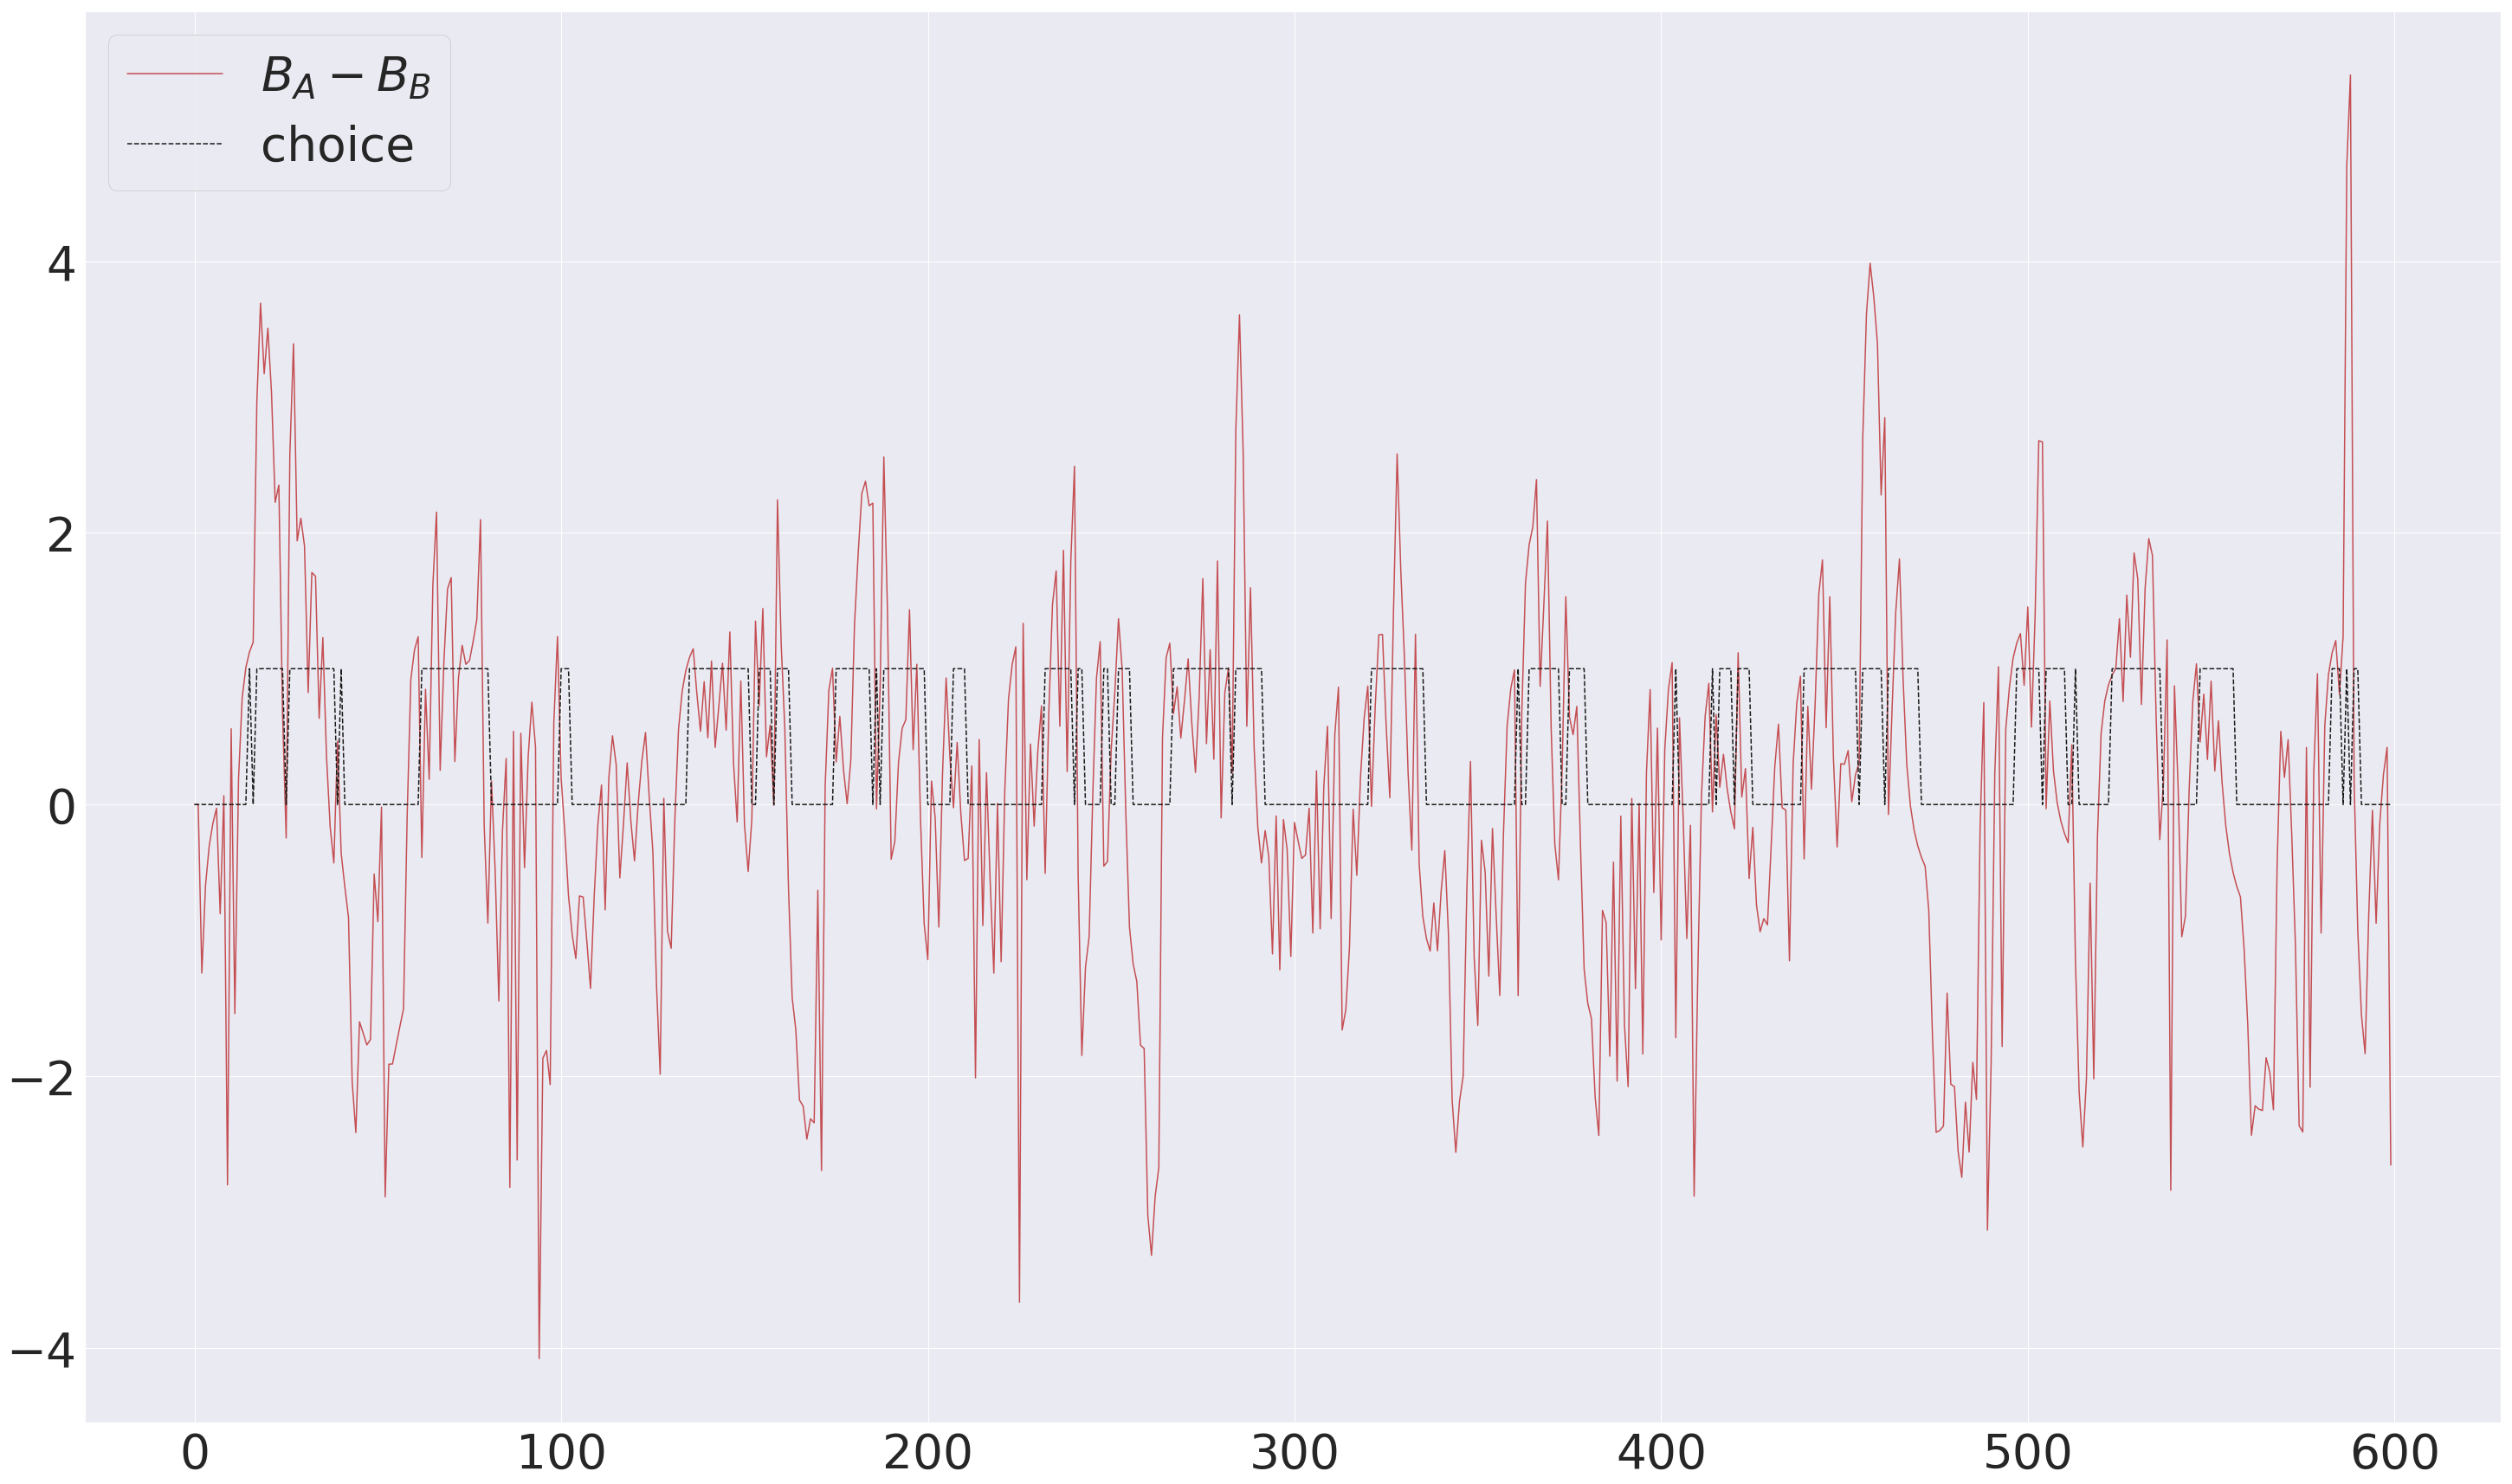

In [124]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.target_B[0:600], 'r', label='$B_{A} - B_{B}$')
plt.plot(all_sim_data.id_choices[0:600], 'k--', label='choice')
plt.legend()

Text(0,0.5,'$B_{choice} - B_{nonchoice}$')

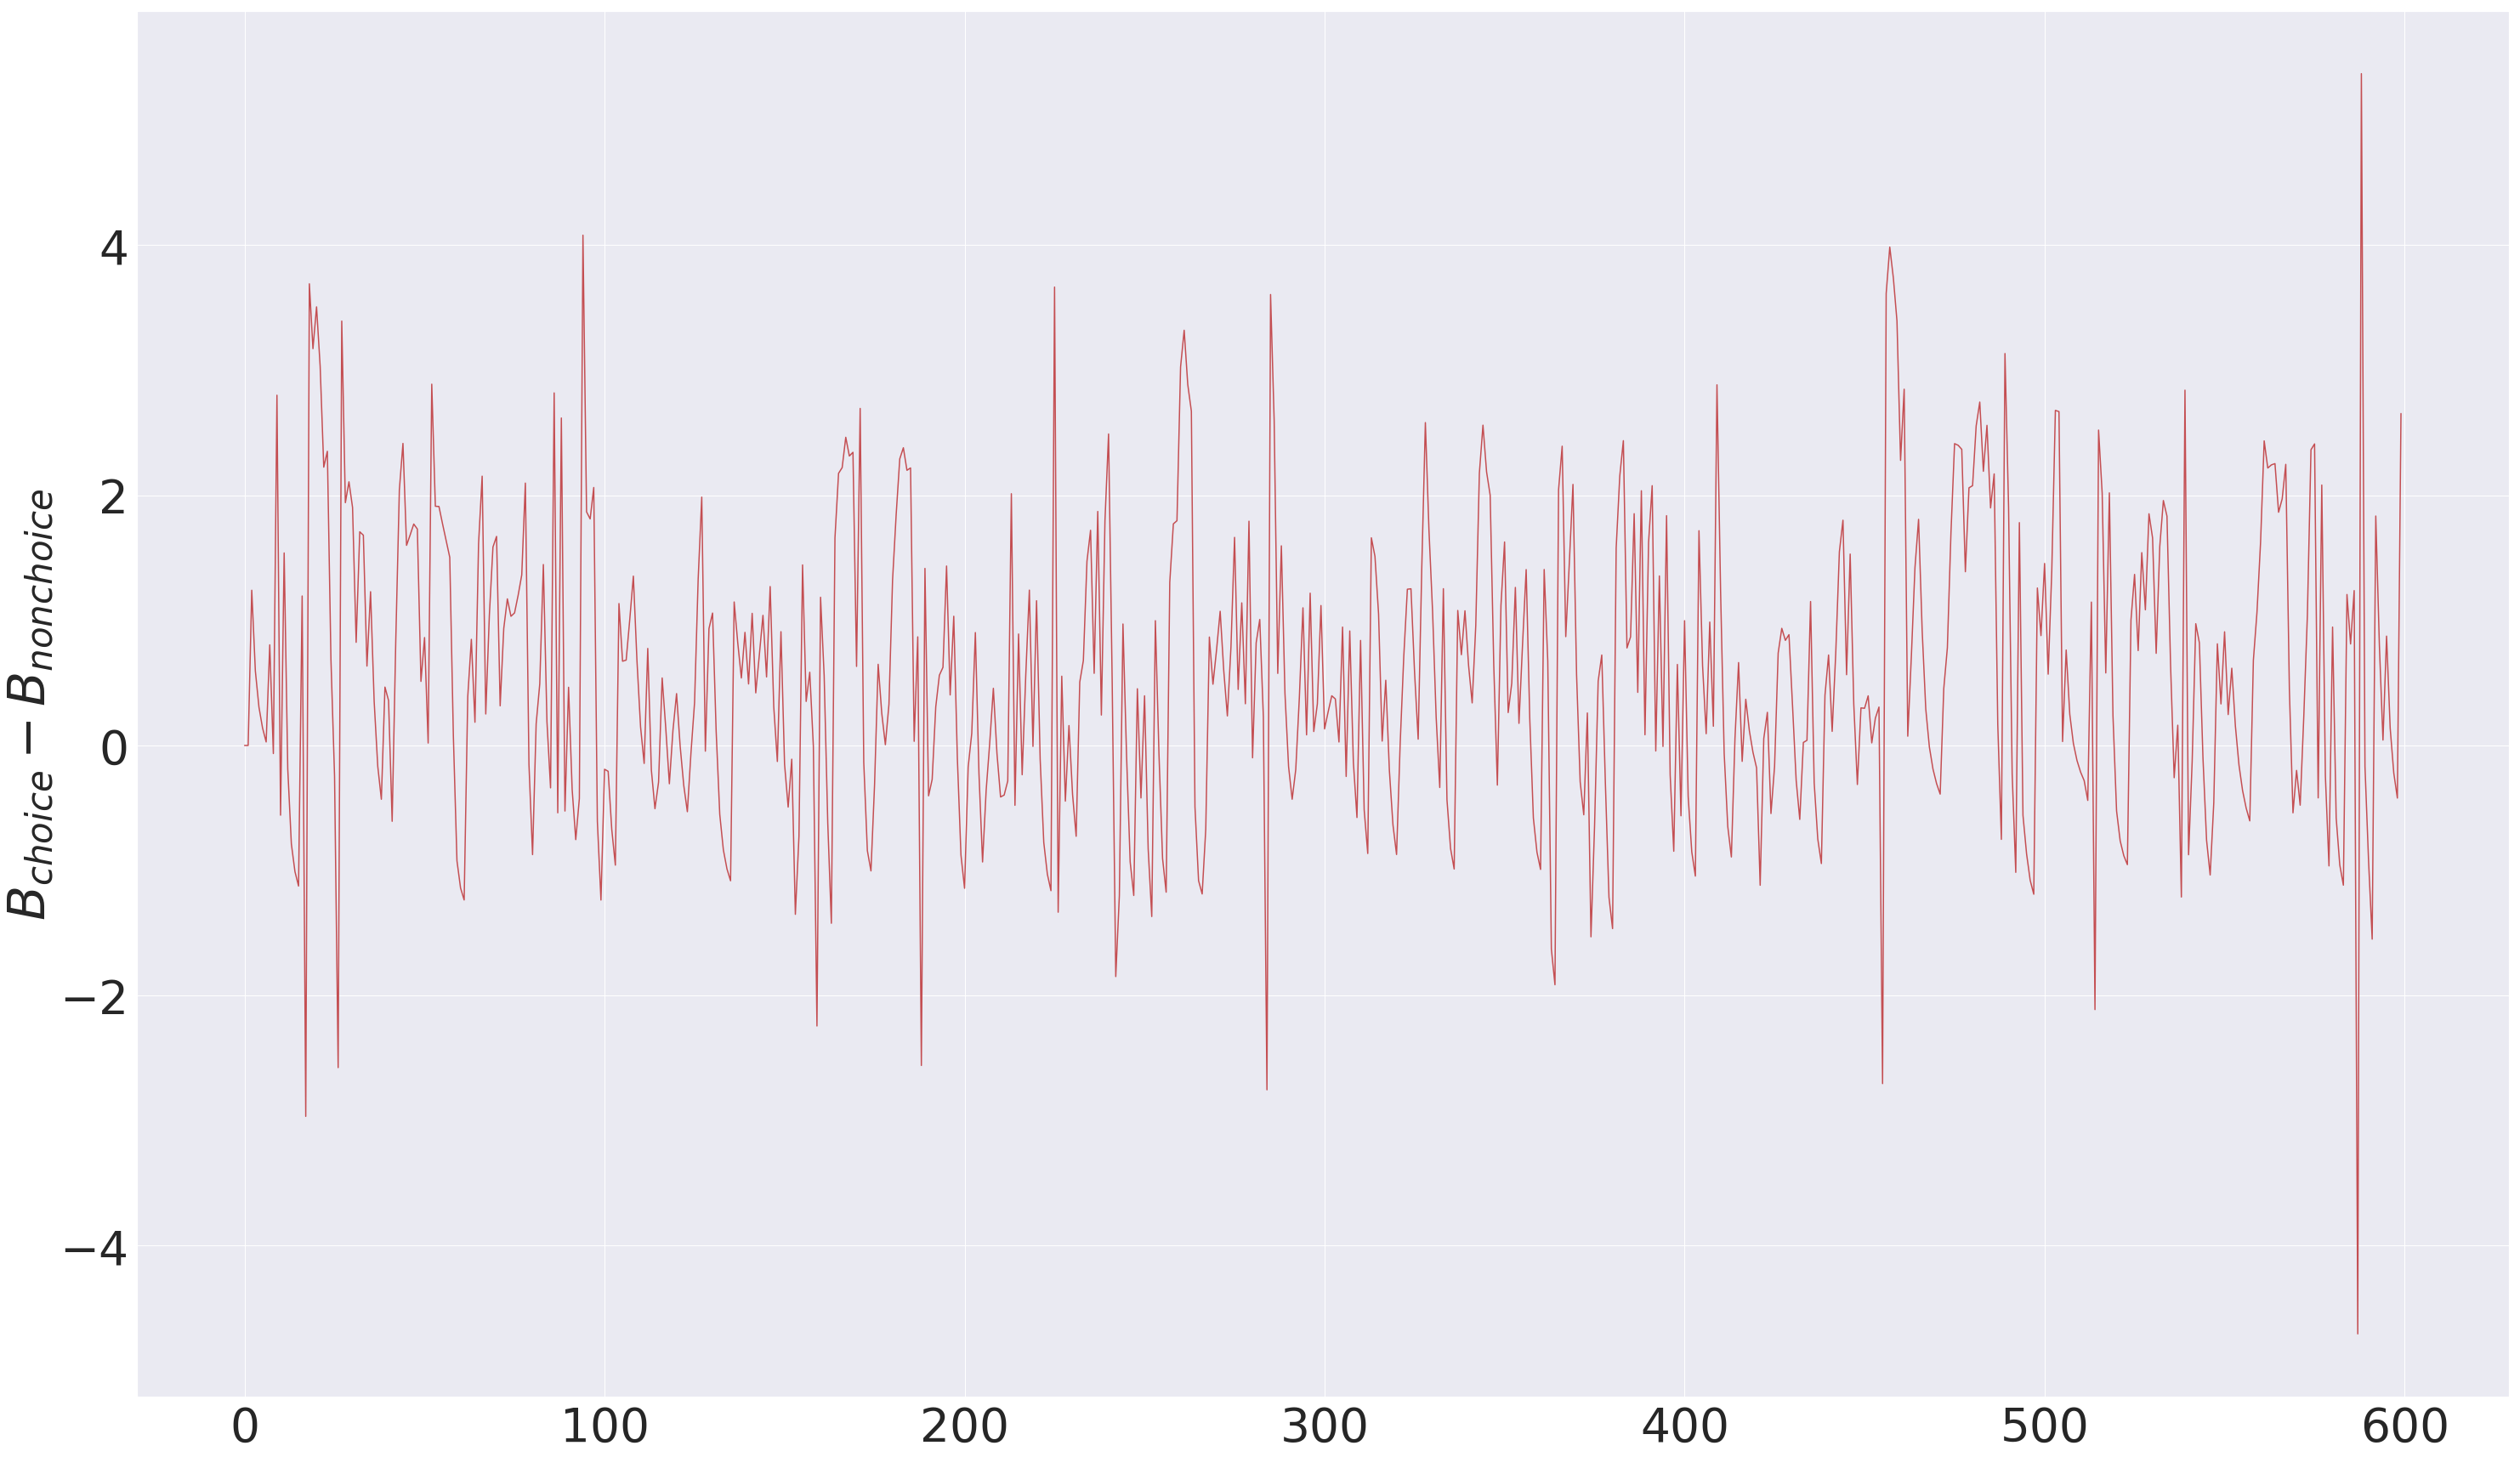

In [95]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.choice_B[0:600], 'r')
plt.ylabel('$B_{choice} - B_{nonchoice}$')

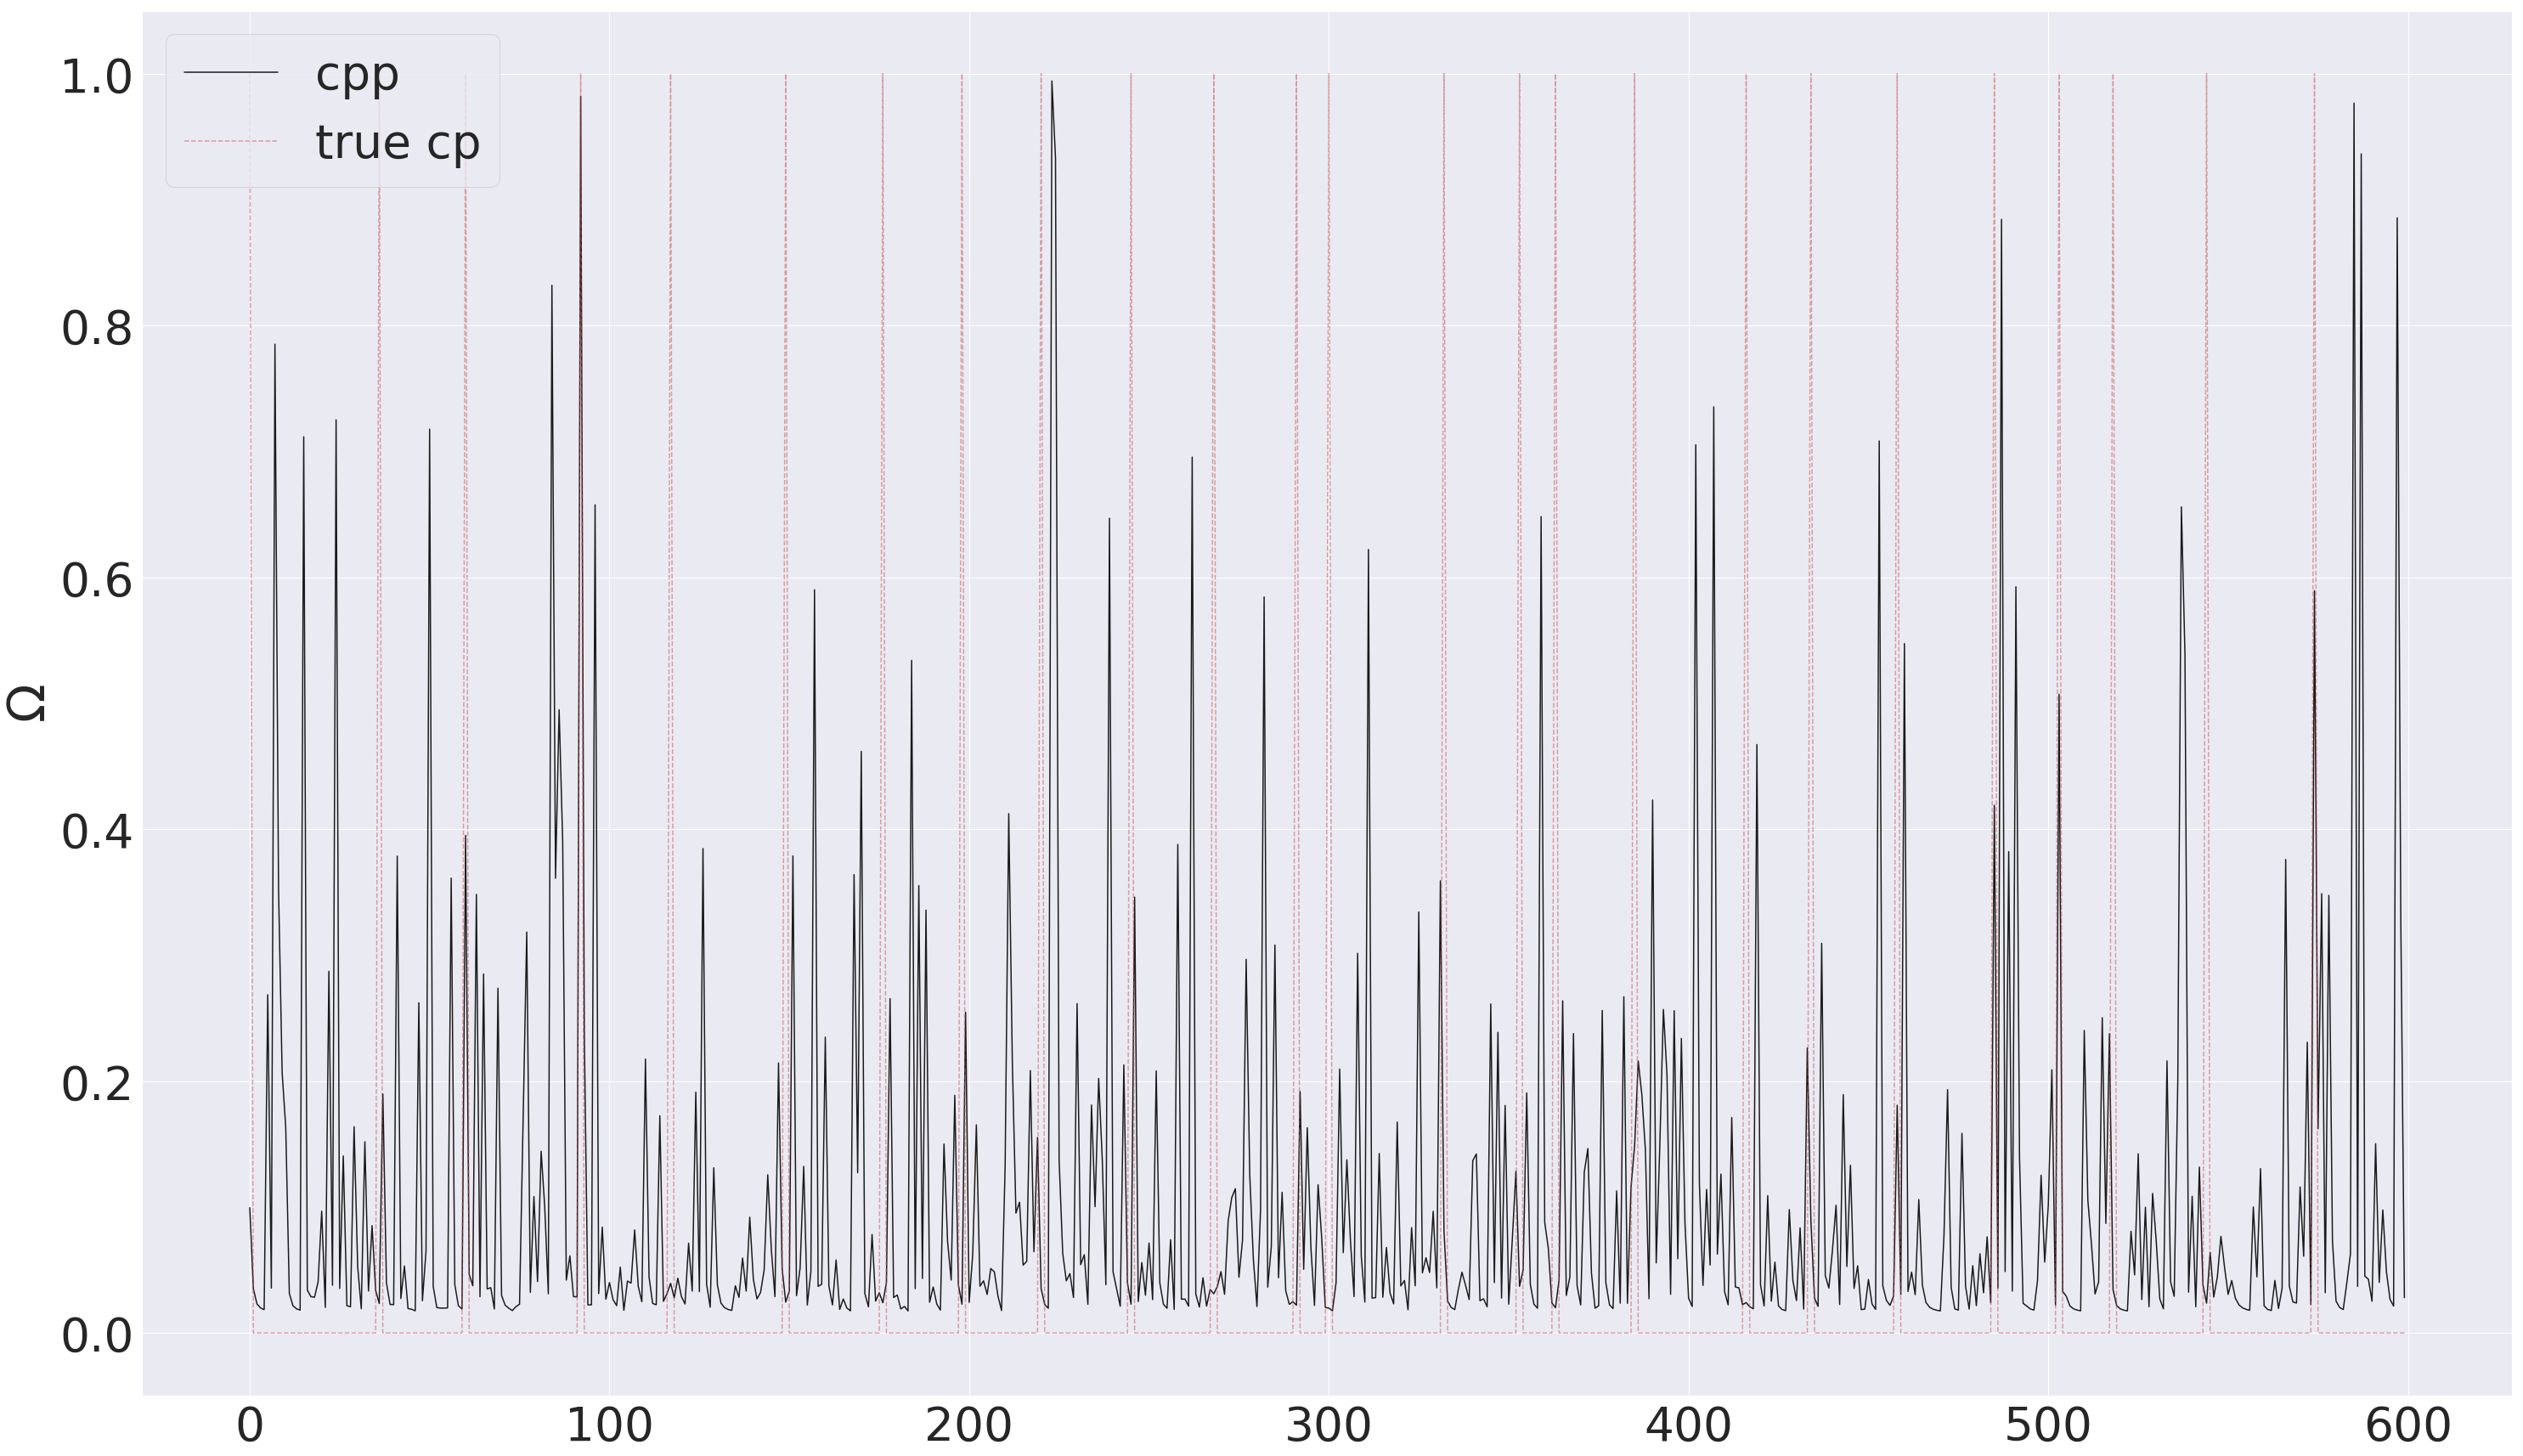

In [96]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.cpp[0:600], 'k', label='cpp')
plt.plot(all_sim_data.cp[0:600], 'r--', alpha=0.5, label='true cp')
plt.ylabel('$\Omega$')
plt.legend(frameon=1,loc='upper left')

In [125]:
#use target choice as response 
#include correct target choice as stimulus 
all_sim_data = all_sim_data.rename(index=str, columns={"id_choices": "response", 
                                                       "correct_id_choices": "stimulus"})
all_sim_data = all_sim_data[['response', 'stimulus', 'rt', 'cond', 'subj_idx', 'target_B', 'cpp']] 
# #use target-based belief in reward difference (b_t0 - b_t1)
all_sim_data = all_sim_data.rename(index=str, columns={'target_B': 'B'})
all_sim_data = all_sim_data[(all_sim_data.rt<0.6) & (all_sim_data.rt > .2)]
all_sim_data.reset_index(drop=True, inplace=True)

In [126]:
all_sim_data['cond'] = all_sim_data['cond'].str.strip()
all_sim_data.head()

,response,stimulus,rt,cond,subj_idx,B,cpp
0,0,1,0.452,hc,0,-1.539093,0.031415
1,1,1,0.342,hc,0,1.124120,0.711650
2,1,1,0.352,hc,0,2.965828,0.028831
3,1,1,0.352,hc,0,3.690923,0.028388
4,1,1,0.352,hc,0,3.172012,0.040570


In [127]:
np.unique(all_sim_data.subj_idx), np.unique(all_sim_data.cond)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array(['hc', 'hv', 'lc', 'lv'], dtype=object))

In [100]:
#these are no longer error flipped but stimulus flipped 
# all_sim_data = hddm.utils.flip_errors(all_sim_data)

In [101]:
# plt.rcParams['figure.figsize'] = 30, 10
# sns.set(font_scale=5)
# fig = plt.figure()
# ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
# for i, subj_data in all_sim_data.groupby('subj_idx'):
#     subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

In [102]:
all_sim_data.columns

Index(['response', 'stimulus', 'rt', 'cond', 'subj_idx', 'B', 'cpp'], dtype='object')

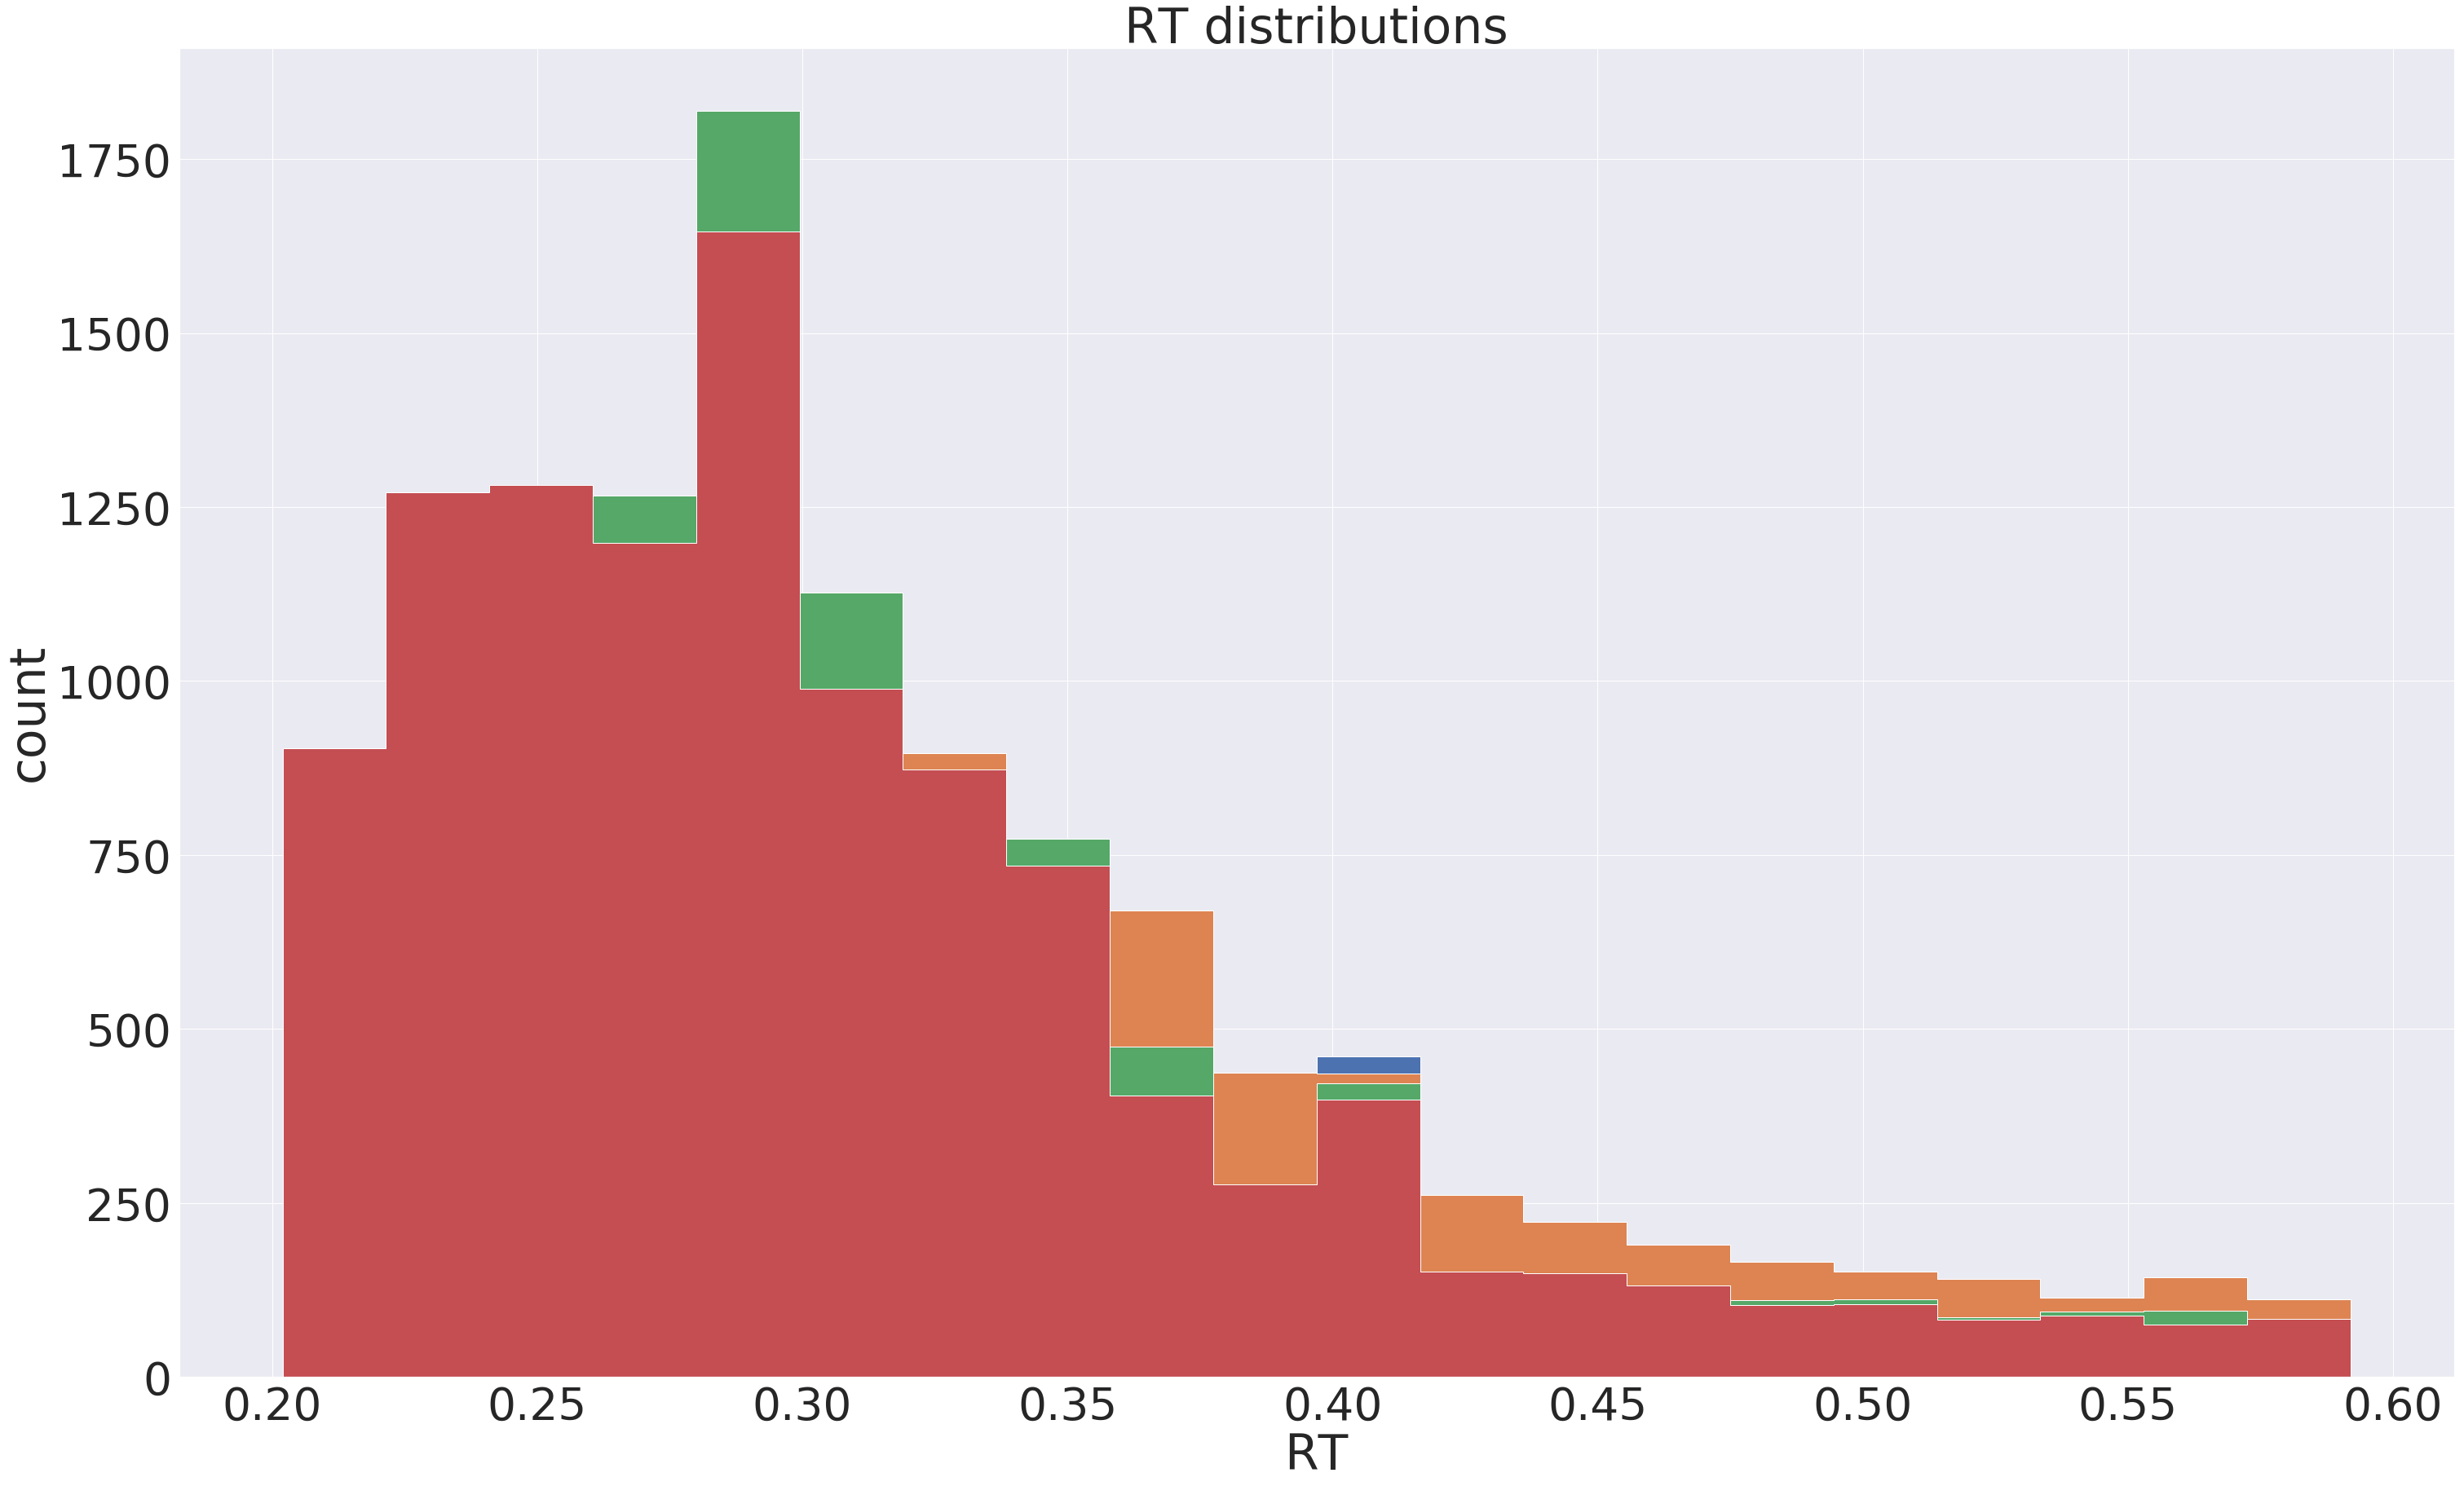

In [128]:
fig=plt.figure(figsize=(50,30))
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in all_sim_data.groupby('cond'):
    subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

Text(0,0.5,'B')

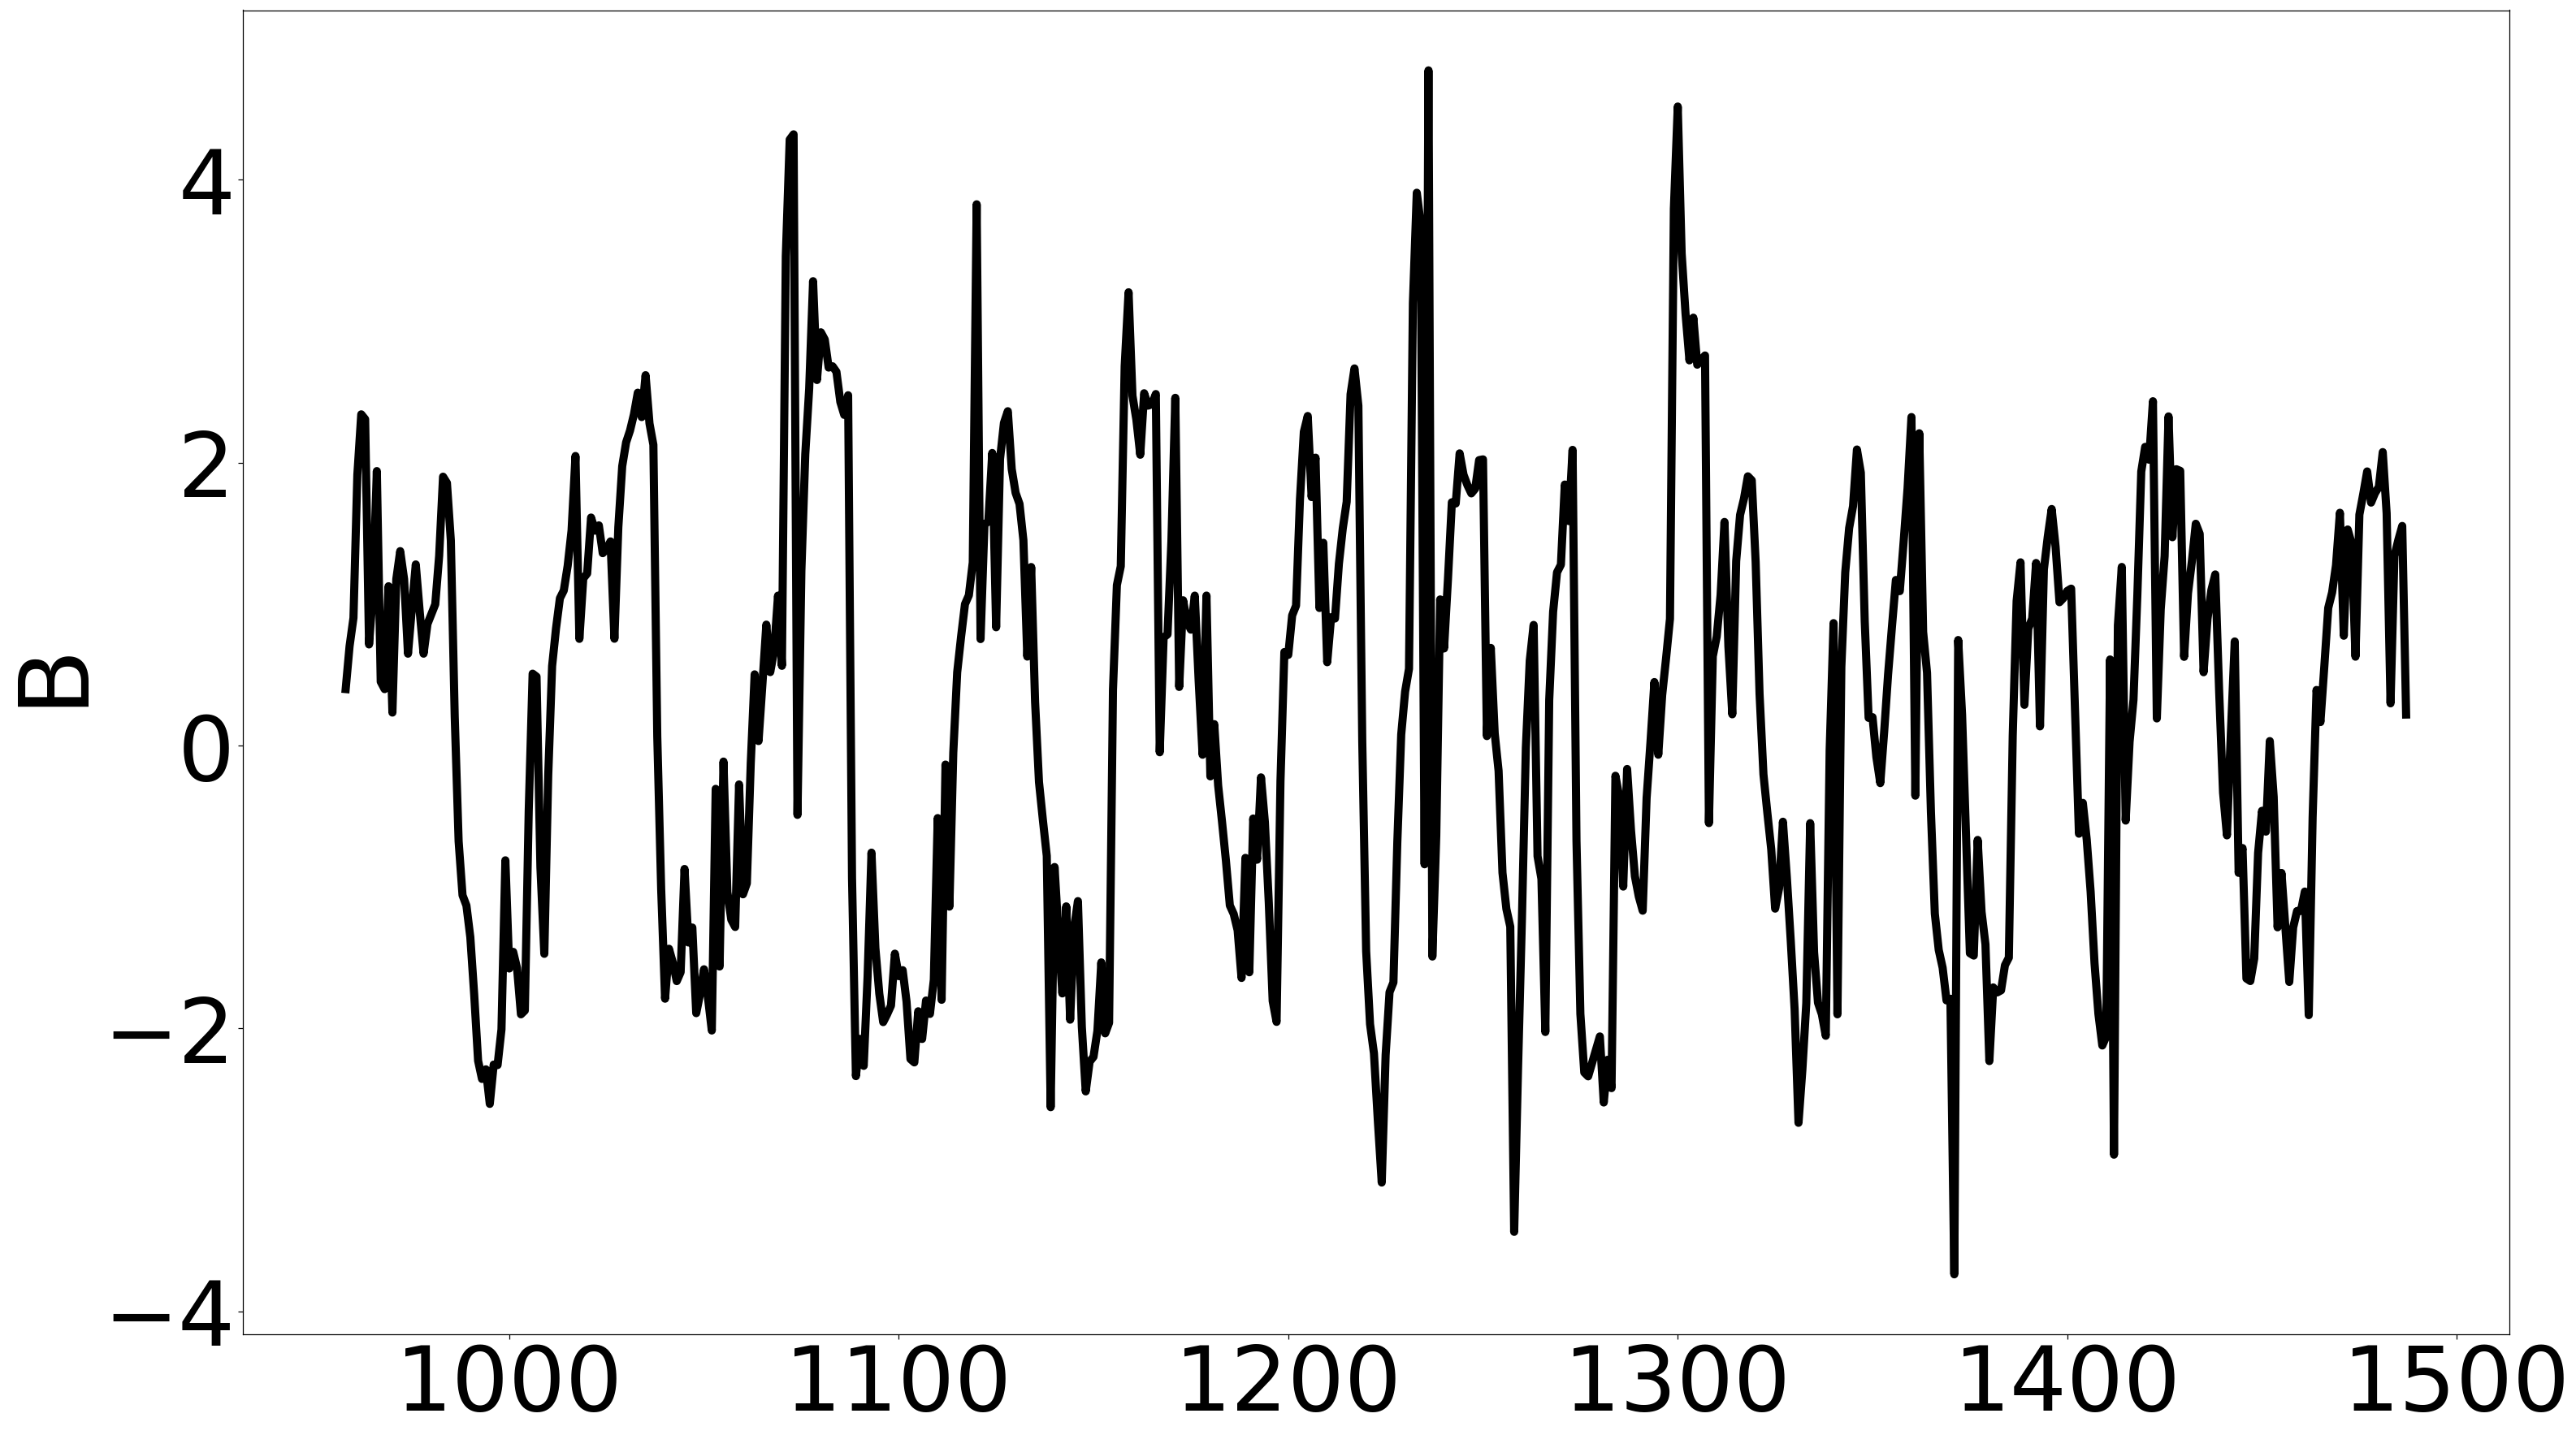

In [19]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.B[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('B')

Text(0,0.5,'stimulus selected')

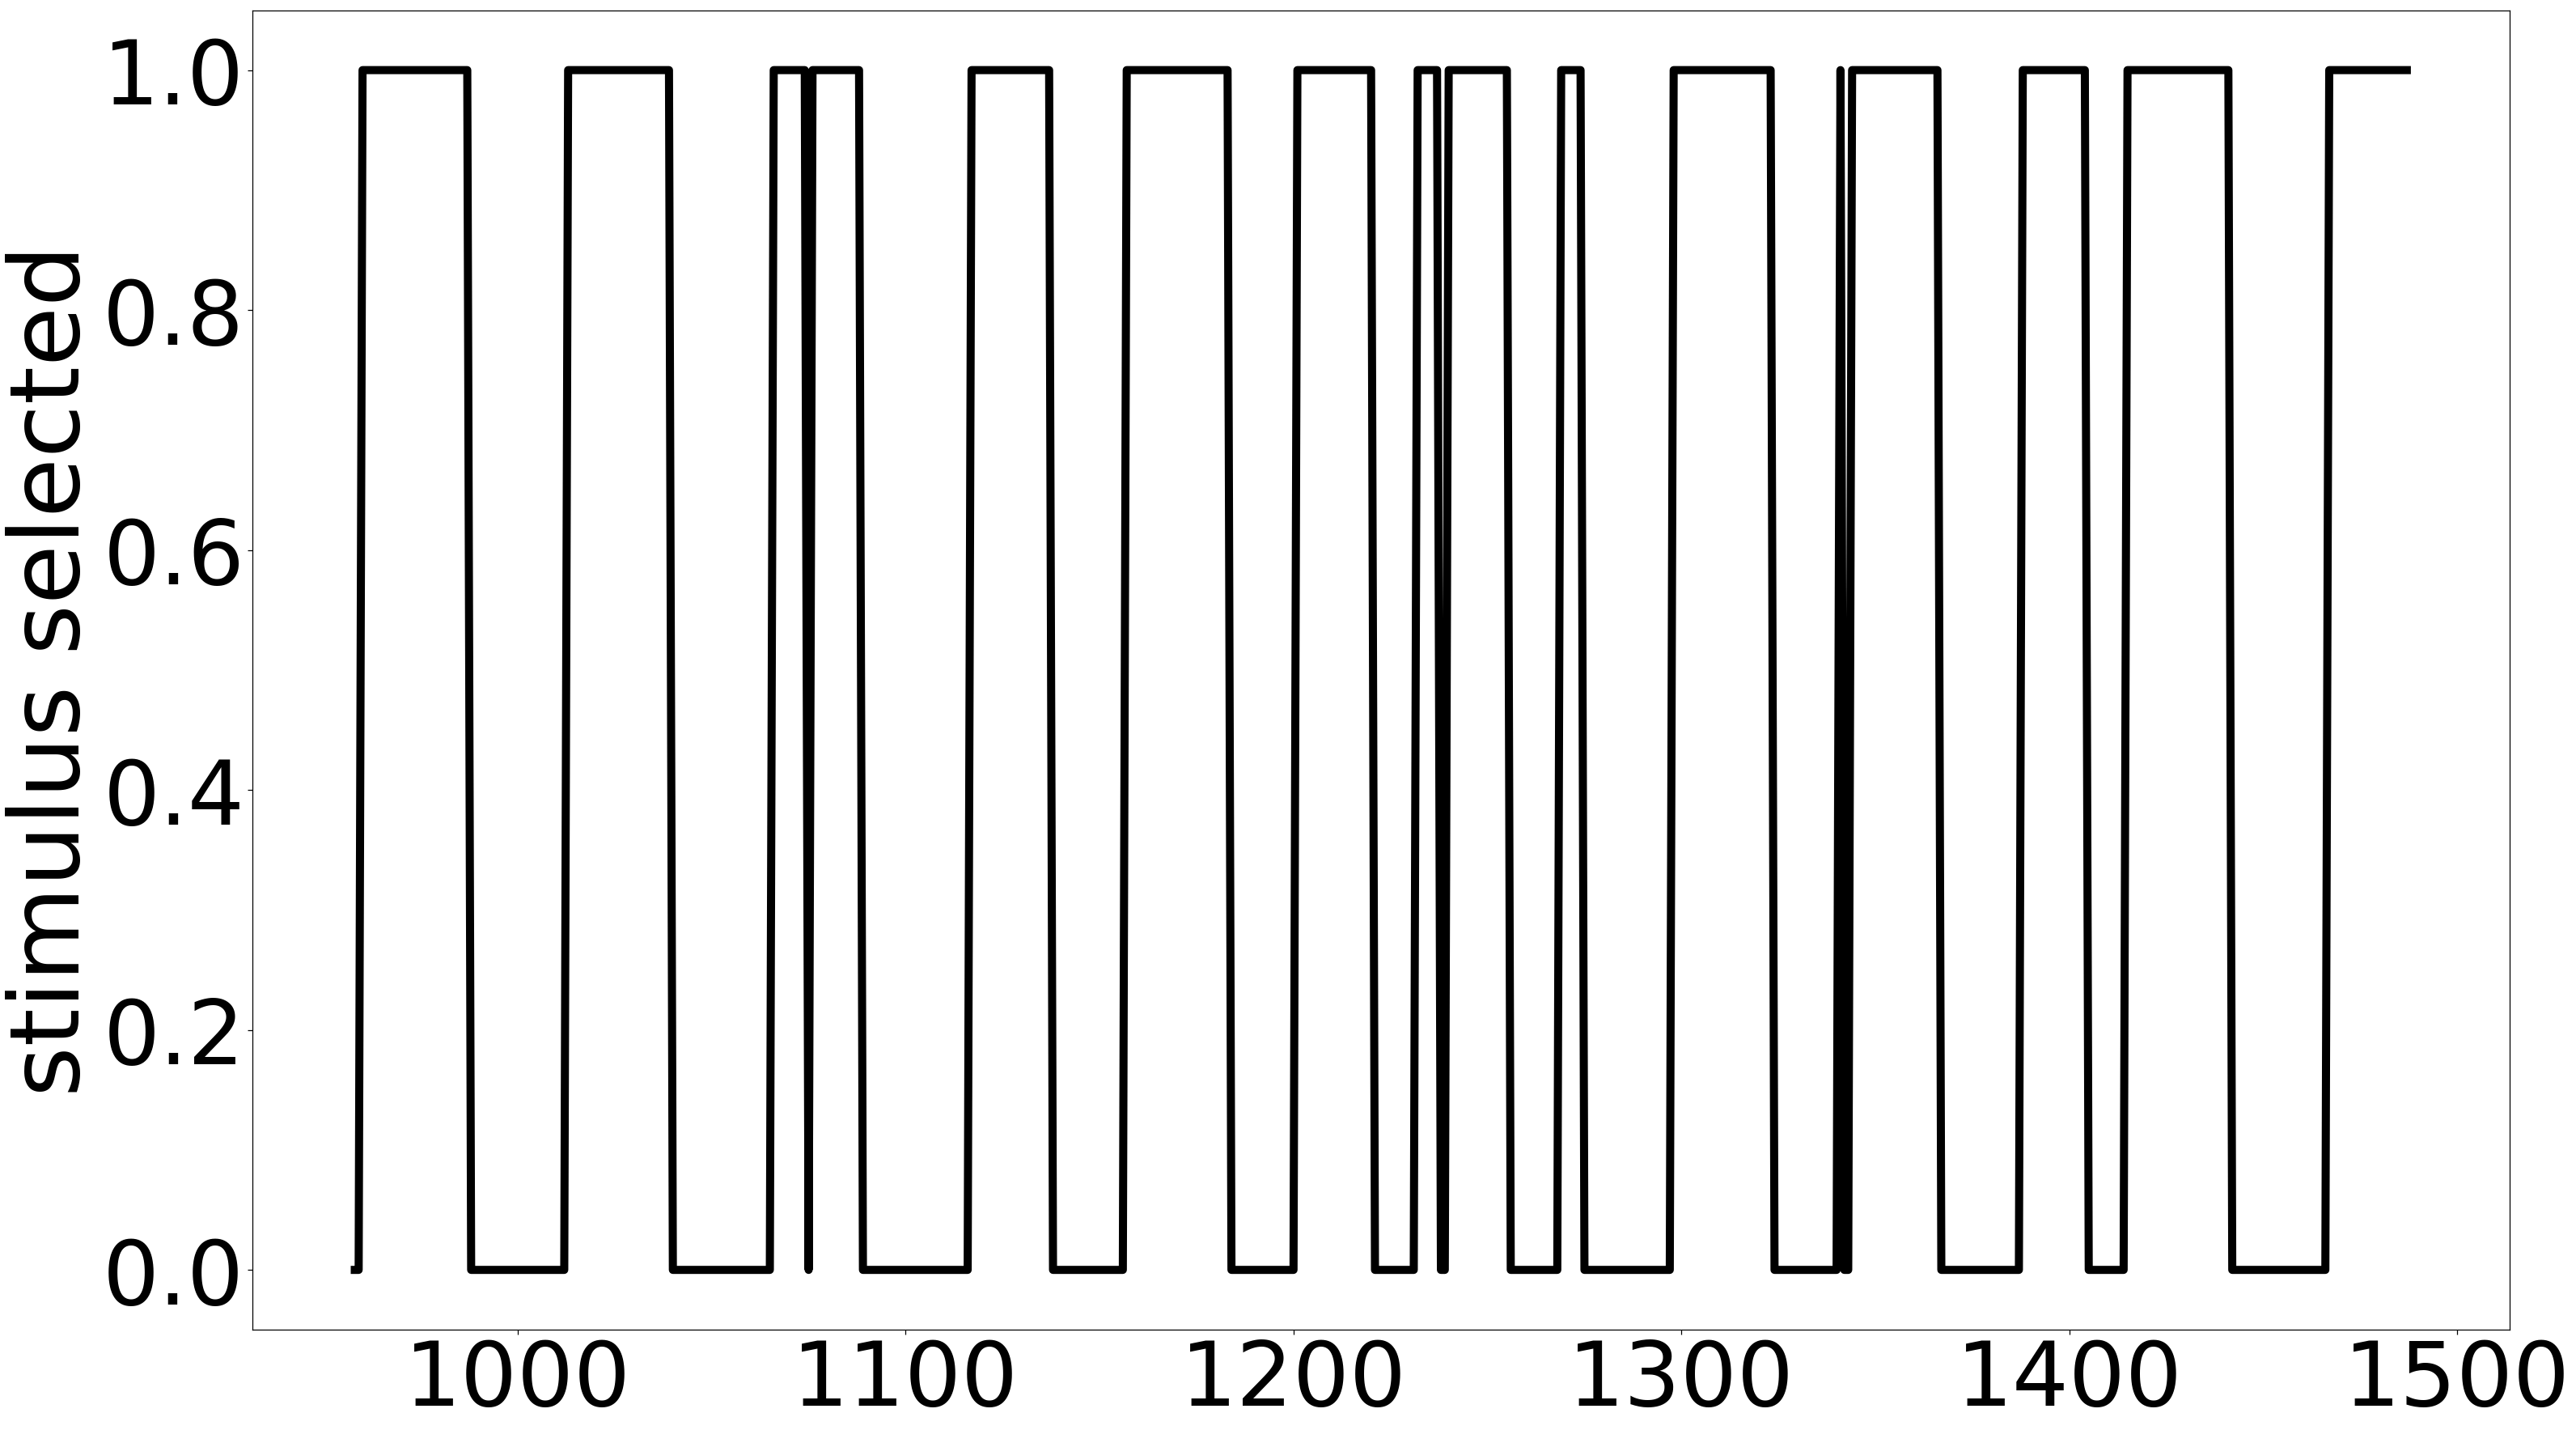

In [20]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.response[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('stimulus selected')

In [21]:
all_sim_data.columns

Index(['response', 'stimulus', 'rt', 'cond', 'subj_idx', 'B', 'cpp'], dtype='object')

Text(0,0.5,'simulated rt')

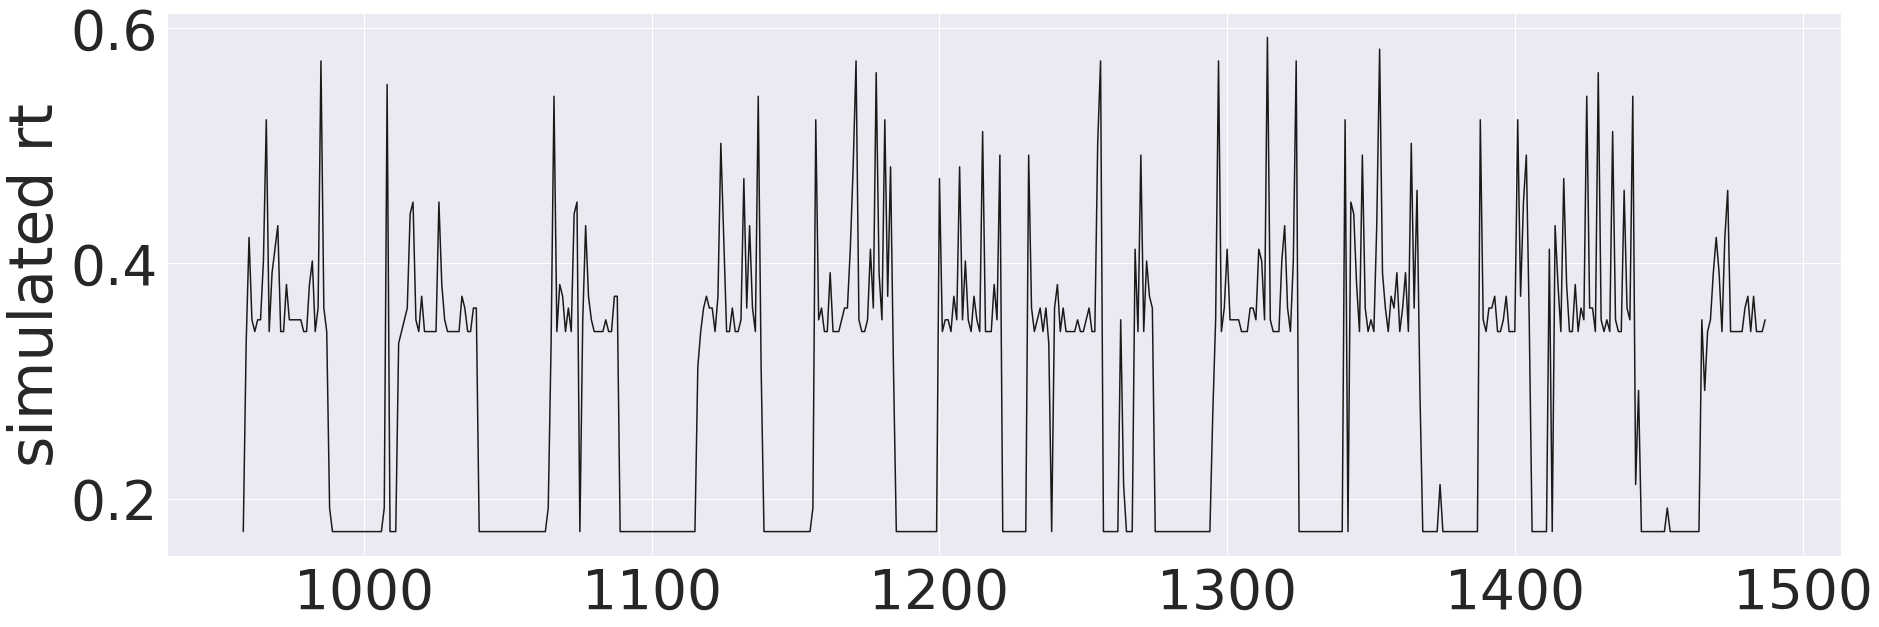

In [22]:
plt.rcParams['figure.figsize'] = 30, 10
sns.set(font_scale=5)
fig = plt.figure()
plt.plot(all_sim_data.rt[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('simulated rt')

Text(0,0.5,'correct stimulus')

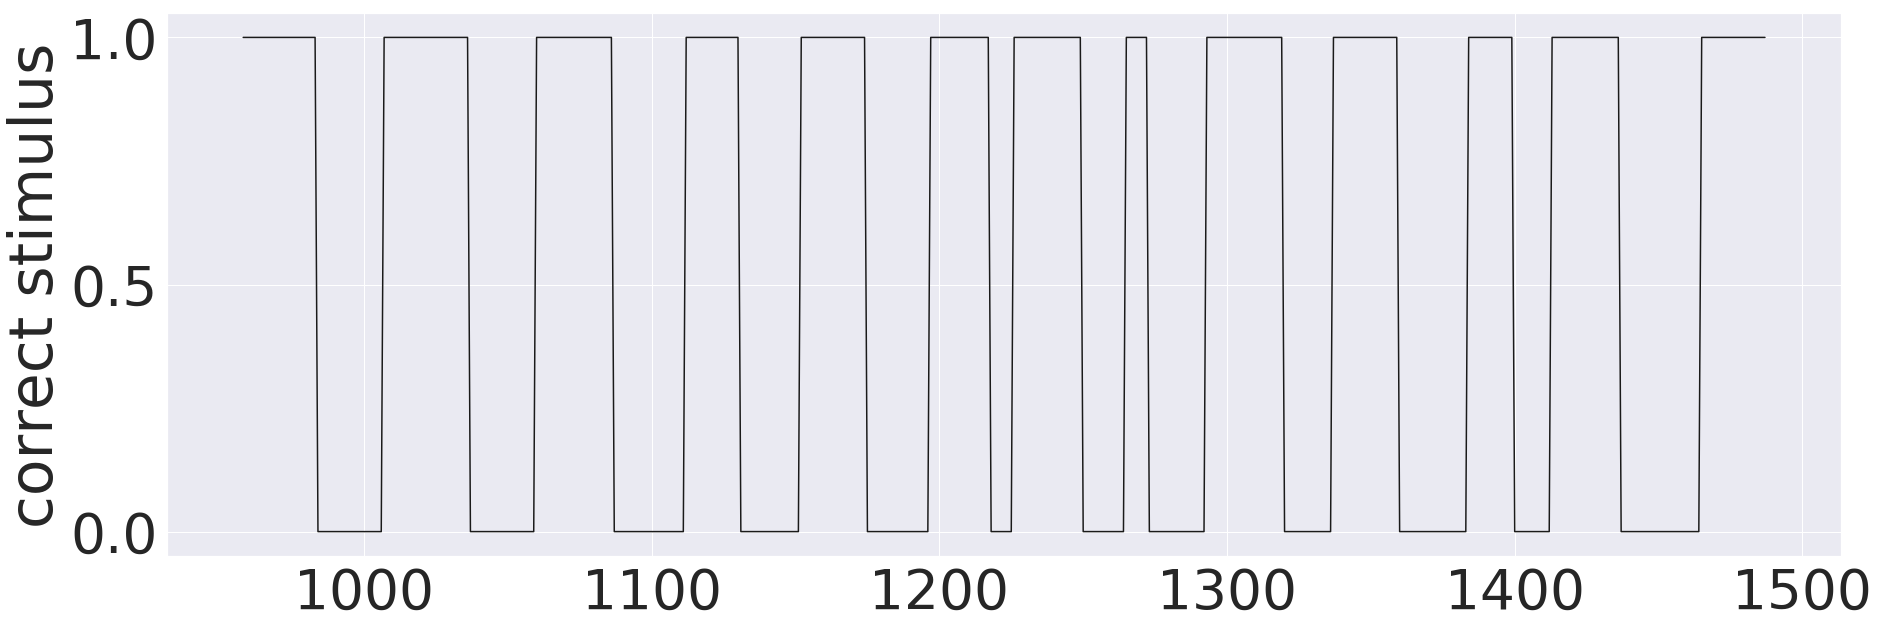

In [23]:
plt.plot(all_sim_data.stimulus[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('correct stimulus')

In [24]:
n_samples, n_burned_samples = 500,200

n_samples_test, n_burned_samples_test, n_thin_test = 10, 2, 2

In [25]:
# def z_link_func(x, data=all_sim_data):
#     stim = (np.asarray(dmatrix('0 + C(s,[[1],[-1]])', {'s':data.stimulus.ix[x.index]})))
#     return 1 / (1 + np.exp(-(x * stim)))

# def v_link_func(x, data=all_sim_data):
#     stim = (np.asarray(dmatrix('0 + C(s,[[1],[-1]])', {'s':data.stimulus.ix[x.index]})))
#     return x * stim

In [26]:
#get all permutations of a,t,v
#hold position of learning signals constant to get all combinations 
#of learning signal and parameter pairs 
from itertools import permutations
from more_itertools import chunked

targets = ['a~', 't~', 'v~','z~']
signals = (('cpp:C(cond)', 'B:C(cond)'),)
param_pairs = list(permutations(targets, 2))
learning_signal_pairs = signals*(int(len(param_pairs)/len(signals)))

print(learning_signal_pairs)
print(param_pairs)

(('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'))
[('a~', 't~'), ('a~', 'v~'), ('a~', 'z~'), ('t~', 'a~'), ('t~', 'v~'), ('t~', 'z~'), ('v~', 'a~'), ('v~', 't~'), ('v~', 'z~'), ('z~', 'a~'), ('z~', 't~'), ('z~', 'v~')]


In [27]:
tuple_idx = np.repeat(list(np.arange(len(learning_signal_pairs))),2)
tuple_element_idx = [0,1]*len(learning_signal_pairs)
models = [param_pairs[t_idx][e_idx] + learning_signal_pairs[t_idx][e_idx] for t_idx,e_idx in zip(tuple_idx, tuple_element_idx)]

In [28]:
reg_descriptions = list(chunked(models,2))
print(reg_descriptions)

model_dict = {'a_cpp_t_B': reg_descriptions[0], 'a_cpp_v_B': reg_descriptions[1],
'a_cpp_z_B': reg_descriptions[2], 't_cpp_a_B': reg_descriptions[3], 
't_cpp_v_B': reg_descriptions[4], 't_cpp_z_B': reg_descriptions[5], 
              'v_cpp_a_B': reg_descriptions[6], 'v_cpp_t_B': reg_descriptions[7],
             'v_cpp_z_B': reg_descriptions[8], 'z_cpp_a_B': reg_descriptions[9],
             'z_cpp_t_B': reg_descriptions[10], 'z_cpp_v_B': reg_descriptions[11]}


[['a~cpp:C(cond)', 't~B:C(cond)'], ['a~cpp:C(cond)', 'v~B:C(cond)'], ['a~cpp:C(cond)', 'z~B:C(cond)'], ['t~cpp:C(cond)', 'a~B:C(cond)'], ['t~cpp:C(cond)', 'v~B:C(cond)'], ['t~cpp:C(cond)', 'z~B:C(cond)'], ['v~cpp:C(cond)', 'a~B:C(cond)'], ['v~cpp:C(cond)', 't~B:C(cond)'], ['v~cpp:C(cond)', 'z~B:C(cond)'], ['z~cpp:C(cond)', 'a~B:C(cond)'], ['z~cpp:C(cond)', 't~B:C(cond)'], ['z~cpp:C(cond)', 'v~B:C(cond)']]


In [48]:
a_cpp_t_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['a_cpp_t_B'], p_outlier=0.05, bias=True, group_only_regressors=True)
# a_cpp_t_B_sim_reg.find_starting_values()
a_cpp_t_B_sim_reg.sample(500,burn=300, dbname='a_cpp_t_B_sim_reg_v2.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp:C(cond)[hc]', 'a_cpp:C(cond)[hv]', 'a_cpp:C(cond)[lc]', 'a_cpp:C(cond)[lv]']
Adding these covariates:
['t_Intercept', 't_B:C(cond)[hc]', 't_B:C(cond)[hv]', 't_B:C(cond)[lc]', 't_B:C(cond)[lv]']


/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [                  1%                  ] 5 of 500 complete in 27.9 secHalting at iteration  4  of  500
Could not generate output statistics for z_subj_trans.3
Could not generate output statistics for z_subj_trans.10
Could not generate output statistics for v_subj.0
Could not generate output statistics for z_trans
Could not generate output statistics for t_Intercept_subj.18
Could not generate output statistics for v_subj.17
Could not generate output statistics for z_subj_trans.1
Could not generate output statistics for t_Intercept_subj.14
Could not generate output statistics for t_Intercept_subj.1
Could not generate output statistics for v_subj.1
Could not generate output statistics for z_subj.2
Could not generate output statistics for v_subj.6
Could not generate output statistics for t_Intercept_subj.0
Could not generate output statistics for z_subj.7
Could not generate output statistics for t_Intercept_subj.5
Could not generate output statistics for v_subj.5
Could not generate output

TypeError: 'NoneType' object is not subscriptable

In [ ]:
a_cpp_v_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['a_cpp_v_B'], p_outlier=0.05,bias=True, group_only_regressors=True)
# a_cpp_v_B_sim_reg.find_starting_values()
a_cpp_v_B_sim_reg.sample(500,burn=300, dbname='a_cpp_v_B_sim_reg_v2.db', db='pickle')

In [ ]:
t_cpp_a_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['t_cpp_a_B'],p_outlier=0.05, bias=True,group_only_regressors=True)
# t_cpp_a_B_sim_reg.find_starting_values()
t_cpp_a_B_sim_reg.sample(500,burn=300,  dbname='t_cpp_a_B_sim_reg_v2.db', db='pickle')

In [ ]:
t_cpp_v_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['t_cpp_v_B'],p_outlier=0.05, bias=True, group_only_regressors=True)
# t_cpp_v_B_sim_reg.find_starting_values()
t_cpp_v_B_sim_reg.sample(500,burn=300,   dbname='t_cpp_v_B_sim_reg_v2.db', db='pickle')

In [ ]:
v_cpp_a_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['v_cpp_a_B'],p_outlier=0.05,bias=True, group_only_regressors=True)
# v_cpp_a_B_sim_reg.find_starting_values()
v_cpp_a_B_sim_reg.sample(500,burn=300,  dbname='v_cpp_a_B_sim_reg_v2.db', db='pickle')

In [ ]:
v_cpp_t_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['v_cpp_t_B'],p_outlier=0.05,bias=True, group_only_regressors=True)
# v_cpp_t_B_sim_reg.find_starting_values()
v_cpp_t_B_sim_reg.sample(500,burn=300,  dbname='v_cpp_t_B_sim_reg_v2.db', db='pickle')

# All $z$ models 

In [108]:
z_cpp_a_B_sim_reg = hddm.HDDMRegressor(all_sim_data, model_dict['z_cpp_a_B'],p_outlier=0.15,  bias=True, 
                                       group_only_regressors=True, )
# z_cpp_a_B_sim_reg.find_starting_values()
z_cpp_a_B_sim_reg.sample(300,burn=20, dbname='z_cpp_a_B_sim_reg_v2.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp:C(cond)[hc]', 'z_cpp:C(cond)[hv]', 'z_cpp:C(cond)[lc]', 'z_cpp:C(cond)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(cond)[hc]', 'a_B:C(cond)[hv]', 'a_B:C(cond)[lc]', 'a_B:C(cond)[lv]']


/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 301 of 300 complete in 1456.9 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [109]:
z_cpp_a_B_sim_reg.dic

-438922.31838865462

In [129]:
#this one can be problematic
z_cpp_v_B_sim_reg = hddm.HDDMRegressor(all_sim_data, model_dict['z_cpp_v_B'],p_outlier=0.15, bias=True, group_only_regressors=True)
# z_cpp_v_B_sim_reg.find_starting_values()
z_cpp_v_B_sim_reg.sample(300,thin=5,  dbname='z_cpp_v_B_sim_reg_v2.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp:C(cond)[hc]', 'z_cpp:C(cond)[hv]', 'z_cpp:C(cond)[lc]', 'z_cpp:C(cond)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(cond)[hc]', 'v_B:C(cond)[hv]', 'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]']


/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 301 of 300 complete in 1644.5 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [131]:
z_cpp_v_B_sim_reg.dic

nan

In [112]:
z_cpp_t_B_sim_reg = hddm.HDDMRegressor(all_sim_data, model_dict['z_cpp_t_B'],p_outlier=0.15,  bias=True, group_only_regressors=True)
# z_cpp_t_B_sim_reg.find_starting_values()
z_cpp_t_B_sim_reg.sample(300,burn=20, dbname='z_cpp_t_B_sim_reg_v2.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp:C(cond)[hc]', 'z_cpp:C(cond)[hv]', 'z_cpp:C(cond)[lc]', 'z_cpp:C(cond)[lv]']
Adding these covariates:
['t_Intercept', 't_B:C(cond)[hc]', 't_B:C(cond)[hv]', 't_B:C(cond)[lc]', 't_B:C(cond)[lv]']


/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [--                7%                  ] 22 of 300 complete in 71.7 secHalting at iteration  21  of  300
Could not generate output statistics for z_Intercept_subj.14
Could not generate output statistics for z_Intercept_subj_trans.20
Could not generate output statistics for z_Intercept_subj_trans.17
Could not generate output statistics for z_Intercept_subj_trans.11
Could not generate output statistics for z_Intercept_subj_trans.23
Could not generate output statistics for z_Intercept_subj_trans.16
Could not generate output statistics for z_cpp:C(cond)[hc]
Could not generate output statistics for t_Intercept_subj.20
Could not generate output statistics for z_Intercept_subj.2
Could not generate output statistics for z_Intercept_subj.12
Could not generate output statistics for z_Intercept_subj_trans.12
Could not generate output statistics for t_Intercept_subj.2
Could not generate output statistics for v_subj.8
Could not generate output statistics for z_Intercept_subj.15
Could not generate 

TypeError: 'NoneType' object is not subscriptable

In [ ]:
z_cpp_t_B_sim_reg.dic

In [ ]:
a_cpp_z_B_sim_reg = hddm.HDDMRegressor(all_sim_data,  model_dict['a_cpp_z_B'], p_outlier=0.15,bias=True, group_only_regressors=True)
# a_cpp_z_B_sim_reg.find_starting_values()
a_cpp_z_B_sim_reg.sample(300,burn=20,  dbname='a_cpp_z_B_sim_reg_v2.db', db='pickle')

In [ ]:
a_cpp_z_B_sim_reg.dic

In [ ]:
v_cpp_z_B_sim_reg = hddm.HDDMRegressor(all_sim_data,  model_dict['v_cpp_z_B'], p_outlier=0.15,bias=True, group_only_regressors=True)
# v_cpp_z_B_sim_reg.find_starting_values()
v_cpp_z_B_sim_reg.sample(300,burn=20, dbname='v_cpp_z_B_sim_reg_v2.db', db='pickle')

In [ ]:
v_cpp_z_B_sim_reg.dic

In [ ]:
t_cpp_z_B_sim_reg = hddm.HDDMRegressor(all_sim_data,  model_dict['t_cpp_z_B'], p_outlier=0.10,bias=True, group_only_regressors=True)
t_cpp_z_B_sim_reg.find_starting_values()
t_cpp_z_B_sim_reg.sample(300,burn=20,  dbname='t_cpp_z_B_sim_reg_v2.db', db='pickle')

In [76]:
t_cpp_z_B_sim_reg.dic

-110765.66704917882

In [ ]:
#send text when the script is done
from twilio.rest import Client
accountSid = 'AC2832bdf83bb5a2f150686d323b7a3440'
authToken = '70363f4f104ac88b8aefc6b7886fb989'
twilioClient = Client(accountSid, authToken)
myTwilioNumber = 6095422252
destCellPhone = 6094242780
myMessage = twilioClient.messages.create(body = "sim z regressions are done. group only regressors.", from_=myTwilioNumber, to=destCellPhone)

# Save models

In [ ]:
#save models... many many samples, much time
a_cpp_t_B_sim_reg.save(write_dir+'a_cpp_t_B_sim_reg_v2')
a_cpp_v_B_sim_reg.save(write_dir+'a_cpp_v_B_sim_reg_v2')
t_cpp_a_B_sim_reg.save(write_dir+'t_cpp_a_B_sim_reg_v2')

t_cpp_v_B_sim_reg.save(write_dir+'t_cpp_v_B_sim_reg_v2')
v_cpp_a_B_sim_reg.save(write_dir+'v_cpp_a_B_sim_reg_v2')
v_cpp_t_B_sim_reg.save(write_dir+'v_cpp_t_B_sim_reg_v2')

save z models 
z_cpp_a_B_sim_reg.save(write_dir+'z_cpp_a_B_sim_reg_v2')
z_cpp_v_B_sim_reg.save(write_dir+'z_cpp_v_B_sim_reg_v2')
z_cpp_t_B_sim_reg.save(write_dir+'z_cpp_t_B_sim_reg_v2')

a_cpp_z_B_sim_reg.save(write_dir+'a_cpp_z_B_sim_reg_v2')
v_cpp_z_B_sim_reg.save(write_dir+'v_cpp_z_B_sim_reg_v2')
t_cpp_z_B_sim_reg.save(write_dir+'t_cpp_z_B_sim_reg_v2')

In [ ]:
#test loading
# hddm.load(write_dir+'a_cpp_t_B_sim_reg')
# hddm.load(write_dir+'a_cpp_v_B_sim_reg')
# hddm.load(write_dir+'t_cpp_a_B_sim_reg')

# hddm.load(write_dir+'t_cpp_v_B_sim_reg')
# hddm.load(write_dir+'v_cpp_a_B_sim_reg')
# hddm.load(write_dir+'v_cpp_t_B_sim_reg')

# a_cpp_v_B_sim_reg.save(write_dir+'a_cpp_v_B_sim_reg')
# t_cpp_a_B_sim_reg.save(write_dir+'t_cpp_a_B_sim_reg')

# t_cpp_v_B_sim_reg.save(write_dir+'t_cpp_v_B_sim_reg')
# v_cpp_a_B_sim_reg.save(write_dir+'v_cpp_a_B_sim_reg')
# v_cpp_t_B_sim_reg.save(write_dir+'v_cpp_t_B_sim_reg')

# Plot model fits

In [ ]:
t=[a_cpp_t_B_sim_reg.dic, a_cpp_v_B_sim_reg.dic,t_cpp_a_B_sim_reg.dic]
min(t)

In [70]:
dics_non_z

[-846736.83377212239,
 -924724.48243365157,
 -869541.83111887949,
 -919914.27821098978,
 -909411.22679559165,
 -801524.51210703515]

In [ ]:
dics_non_z = [a_cpp_t_B_sim_reg.dic, a_cpp_v_B_sim_reg.dic,t_cpp_a_B_sim_reg.dic,
    t_cpp_v_B_sim_reg.dic, v_cpp_a_B_sim_reg.dic, v_cpp_t_B_sim_reg.dic]

In [72]:
dics_z =  [z_cpp_a_B_sim_reg.dic, z_cpp_v_B_sim_reg.dic, z_cpp_t_B_sim_reg.dic,
    a_cpp_z_B_sim_reg.dic, v_cpp_z_B_sim_reg.dic,t_cpp_z_B_sim_reg.dic]

In [38]:
dics_non_z = [a_cpp_t_B_sim_reg.dic, a_cpp_v_B_sim_reg.dic,t_cpp_a_B_sim_reg.dic,
    t_cpp_v_B_sim_reg.dic, v_cpp_a_B_sim_reg.dic, v_cpp_t_B_sim_reg.dic]
# dics_z =  [z_cpp_a_B_sim_reg.dic, z_cpp_v_B_sim_reg.dic, z_cpp_t_B_sim_reg.dic,
#     a_cpp_z_B_sim_reg.dic, v_cpp_z_B_sim_reg.dic,t_cpp_z_B_sim_reg.dic]

m_names_non_z = ['a_cpp & t_B', 'a_cpp & v_B', 't_cpp & a_B', 
't_cpp & v_B', 'v_cpp & a_B', 'v_cpp & t_B']

m_names_z =  [ 'z_cpp & a_B', 'z_cpp & v_B', 'z_cpp & t_B',
  'a_cpp & z_B', 'v_cpp & z_B', 't_cpp & z_B']

In [ ]:
dics_non_z, dics_z

In [ ]:
dics_z

In [ ]:
win_idx = np.where(dics_non_z==min(dics_non_z))[0]
m_names[win_idx]

In [ ]:
sns.set(font_scale=3)  
 
plt.bar(m_names_non_z, dics_non_z, color='r')
plt.ylim(min(dics_non_z) - 550, max(dics_non_z) + 500)
plt.ylabel('DIC score')
plt.title('Simulated: All unique pairwise combinations of parameters and learning signals')


In [ ]:
m_names[1], m_names[3], m_names[7]

In [ ]:
[dics[1], dics[3], dics[7]]

In [ ]:
plt.bar([m_names[1], m_names[3], m_names[7]], [dics[1], dics[3], dics[7]], color='r')
plt.ylim(dics[3] - 100, dics[2] + 100)
plt.ylabel('DIC score')
plt.title('Simulated: Winning and second-to-winning models')


In [ ]:
diff_first_second = z_cpp_v_B_sim_reg.dic - t_cpp_v_B_sim_reg.dic
print(diff_first_second)

In [ ]:
z_cpp_v_B_sim_reg.nodes_db

# Plot posteriors of regression coefficients

In [ ]:
#plot posteriors for winning model 
v_hc_gen, v_hv_gen,  v_lc_gen, v_lv_gen = a_cpp_v_B_sim_reg.nodes_db.ix[['v_B:C(cond)[hc]', 'v_B:C(cond)[hv]', 
                                                             'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]'],
                                                          'node']


a_hc_gen, a_hv_gen, a_lc_gen, a_lv_gen = a_cpp_v_B_sim_reg.nodes_db.ix[['a_cpp:C(cond)[hc]', 'a_cpp:C(cond)[hv]', 
                                                             'a_cpp:C(cond)[lc]', 'a_cpp:C(cond)[lv]'],
                                                          'node']

In [ ]:
hddm.analyze.plot_posterior_nodes([v_lc_gen, v_hc_gen])
plt.xlabel('$B$ regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of $B$:drift-rate effect')
# plt.savefig('600t_drifa_conflict.pdf')

hddm.analyze.plot_posterior_nodes([v_lv_gen, v_hv_gen])
plt.xlabel('$B$ regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of $B$:drift-rate effect')
# plt.savefig('600a_drifa_vol.pdf')

hddm.analyze.plot_posterior_nodes([a_lc_gen, a_hc_gen])
plt.xlabel('$\Omega$ regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of $\Omega$:threshold effect')
# plt.savefig('600a_bound_conflict.pdf')


hddm.analyze.plot_posterior_nodes([a_lv_gen, a_hv_gen])
plt.xlabel('$\Omega$ regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of $\Omega$:threshold effect')
# plt.savefig('600a_bound_vol.pdf')


In [ ]:
plt.figure(figsize=(50,30))
sns.distplot(v_hc_gen.trace(), label=r'$\beta_{hc}$', hist=False,rug=True,color='red', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(v_lc_gen.trace(), label=r'$\beta_{lc}$', hist=False,rug=True,color='blue', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Conflict', fontsize='large')
plt.ylabel('Simulated posterior probability density', fontsize='large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='large')
plt.xlim([1,2])
plt.savefig('vB_betas_conflict_SIM.png', dpi=600)

In [ ]:
plt.figure(figsize=(50,30))
sns.distplot(v_hv_gen.trace(), label=r'$\beta_{hv}$', hist=False,rug=True,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(v_lv_gen.trace(), label=r'$\beta_{lv}$', hist=False,rug=True,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Volatility', fontsize='large')
plt.ylabel('Simulated posterior probability density', fontsize='large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='large')
plt.xlim([1,2])
plt.savefig('vB_betas_volatility_SIM.png', dpi=600)

In [ ]:
plt.figure(figsize=(50,30))
sns.distplot(a_hv_gen.trace(), label=r'$\beta_{hv}$', hist=False,rug=True,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(a_lv_gen.trace(), label=r'$\beta_{lv}$', hist=False,rug=True,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Volatility', fontsize='large')
plt.ylabel('Simulated posterior probability density', fontsize='large')
plt.xlabel(r'$\beta_{a\textasciitilde \Omega}$',fontsize='large')
plt.xlim([-0.3,0.3])
plt.savefig('aCPP_betas_volatility_SIM.png', dpi=600)

In [ ]:
plt.figure(figsize=(50,30))
sns.distplot(a_hc_gen.trace(), label=r'$\beta_{hc}$', hist=False,rug=True,color='red', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(a_lc_gen.trace(), label=r'$\beta_{lc}$', hist=False,rug=True,color='blue', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Conflict', fontsize='large')
plt.ylabel('Simulated posterior probability density', fontsize='large')
plt.xlabel(r'$\beta_{a\textasciitilde \Omega}$',fontsize='large')
plt.xlim([-0.3,0.3])
plt.savefig('aCPP_betas_conflict_SIM.png', dpi=600)

In [ ]:
# model_names_header = ', '.join(m_names)
# print_dics = np.column_stack(dics)
# np.savetxt(write_dir+'sim_test_gen_model.csv', print_dics, header=model_names_header, delimiter=',',comments='')

In [ ]:
#ipcluster start

def run_model(id):
    import hddm
    data = hddm.load_csv('mydata.csv')
    m = hddm.HDDM(data)
    m.find_starting_values()
    m.sample(5000, burn=20, dbname='db%i'%id, db='pickle')
    return m

from IPython.parallel import Client
v = Client()[:]
jobs = v.map(run_model, range(4)) # 4 is the number of CPUs
models = jobs.get()
gelman_rubin(models)

# Create a new model that has all traces concatenated
# of individual models.
combined_model = kabuki.utils.concat_models(models)